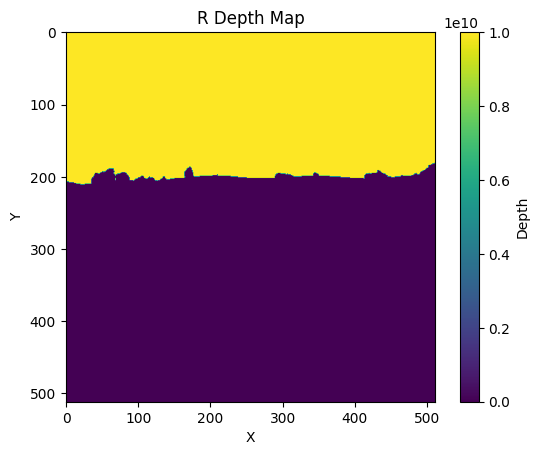

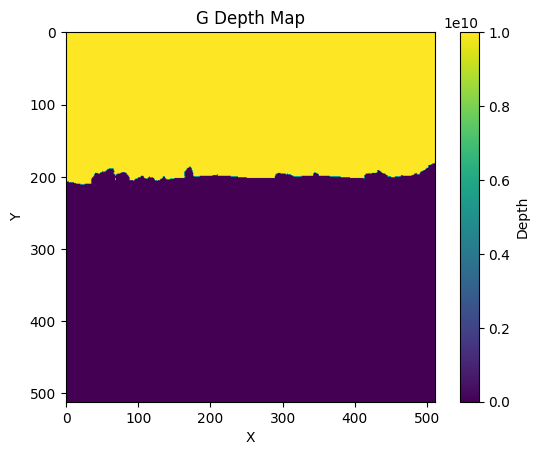

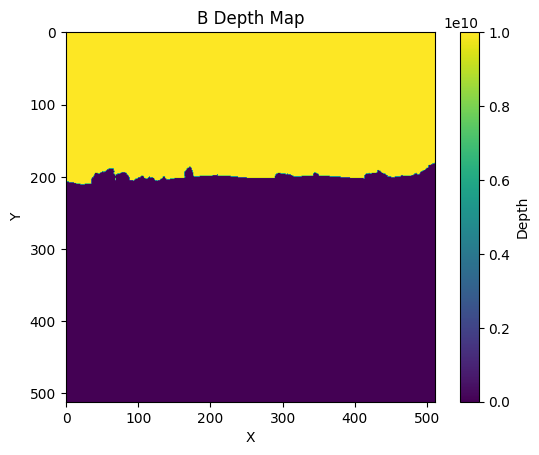

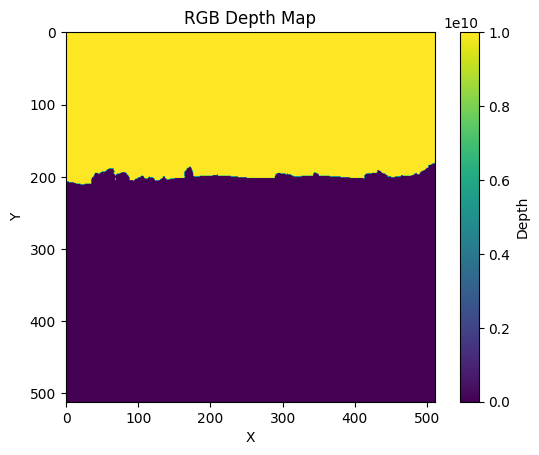

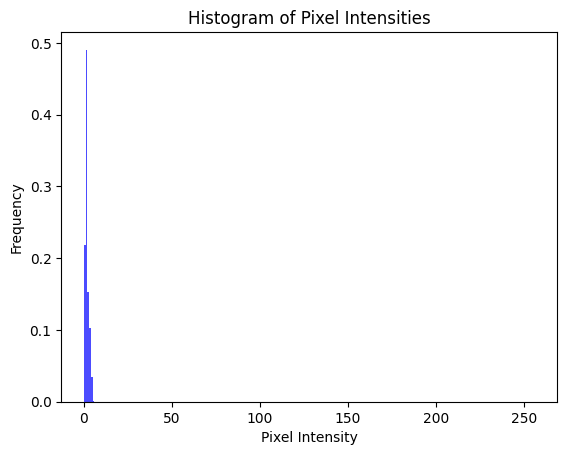

1.1865132

In [ ]:
!pip install OpenEXR
import OpenEXR
import numpy as np
import Imath

depth_map_path="/content/00050Left.exr" # Changed variable name to avoid overwriting

def read_exr(file_path,Channel):
    # Open the EXR file
    exr_file = OpenEXR.InputFile(file_path)

    # Get the header to obtain the data window
    header = exr_file.header()
    dw = header['dataWindow']
    size = (dw.max.x - dw.min.x + 1, dw.max.y - dw.min.y + 1)

    # Define the channels (assuming the depth map is in the 'Z' channel)
    FLOAT = Imath.PixelType(Imath.PixelType.FLOAT)
    channel = exr_file.channel(Channel, FLOAT)

    # Convert the data to numpy array
    depth_map = np.frombuffer(channel, dtype=np.float32)
    depth_map.shape = (size[1], size[0])  # (height, width)

    return depth_map

#initial_depth_map = read_exr(depth_map_path,'R') # Changed variable name to avoid overwriting

import matplotlib.pyplot as plt

def display_depth_map(depth_map,channel):
    plt.imshow(depth_map, cmap='viridis')
    plt.colorbar(label='Depth')
    plt.title(channel+' Depth Map')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()



depth_map_r=read_exr(depth_map_path,'R') # Pass the file path instead of the array
depth_map_g=read_exr(depth_map_path,'G')
depth_map_b=read_exr(depth_map_path,'B')

display_depth_map(depth_map_r,'R')
display_depth_map(depth_map_g,'G')
display_depth_map(depth_map_b,'B')

depth_map=np.stack([depth_map_r,depth_map_g,depth_map_b],axis=-1)
import cv2
depth_map=cv2.cvtColor(depth_map,cv2.COLOR_RGB2BGR)
depth_map=cv2.cvtColor(depth_map,cv2.COLOR_BGR2GRAY)
display_depth_map(depth_map,'RGB')

def plot_histogram(image):
    # Flatten the image to a 1D array
    pixel_values = image.flatten()

    # Plot the histogram
    plt.hist(pixel_values, bins=256, range=(0, 256), density=True, color='blue', alpha=0.7)
    plt.title('Histogram of Pixel Intensities')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.show()

plot_histogram(depth_map.copy())

depth_map[400].mean()

